In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
λ_Re = np.log(2)/(41.2)
λ_U = np.log(2)/(4.468)
λ_Th = np.log(2)/(14.05)
λ_Rb = np.log(2)/(49.7)

#Setting initial parameters
#"Values from Nucleo-Cosmochronology and Chemical Evolution Modellings" and "the UTh production ratio and the age of the Milky Way from meteorites and Galactic halo stars.pdf"
M_tot_Tg = 56 # +/5     M⊙ pc^-1
M_gas_Tg = 13  # +/- 4     M⊙ pc^-1
ω = 0.0462 # +/- M⊙^-0.4 pc^0.8 Gyr^-1
schmidt_power = 1.4 # +/- 0.15
z1_yield = 0.5166
z2_yield = 1

[]

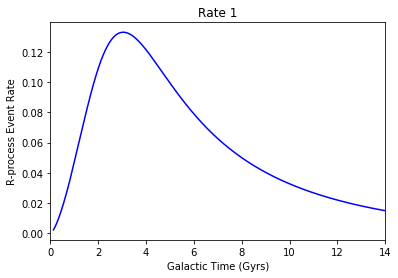

In [4]:
#Need to convert to the same units as above - Do this by taking the current value as 1 and refering everything to that value.
#Rate 1: "Cosmic Star Formation History"
def rate_1_calculation():
    Z = np.linspace(0,14,10000)
    SFR = (0.015*(1+Z)**2.7)/(1+((1+Z)/2.9)**5.6)
    R_rate = SFR #Gpc^-3 yr^-1
    
    #Converting the rate to pc^-2 Gyr^-1
    
    #R_rate = ((R_rate**1/3)*1000)**2
    time = 28/(1+(1+Z)**2)
    return time,R_rate
time,rate_1 = rate_1_calculation()

#Plotting the graph of the SrRb ratio
fig6, ax7 = plt.subplots()
ax7.plot(time,rate_1,color='b',label='R-rate 1')
ax7.set_xlabel('Galactic Time (Gyrs)')
ax7.set_ylabel('R-process Event Rate')
ax7.set_title('Rate 1')
ax7.set_xlim(0,14)
plt.plot()

In [4]:
#Adding a 0 to the start of the array
time_0 = np.array([0])
time = np.concatenate((time,time_0),axis=0)
rate_1 = np.concatenate((rate_1,time_0),axis=0)

time = np.flip(time)
rate_1 = np.flip(rate_1)

N = len(time)
t_max = 14

In [5]:
#Inflow rate distribution funtion
def normal_dist_function(t):
    tau = 3.46
    return (1/np.sqrt(2*np.pi*tau**2)) * np.exp(-((t-tau)**2)/(2*tau**2))

#Calling the normal distribution function
M_inflow_rate = normal_dist_function(time)

#Creating the cumulative distribution curve, ie total mass at time t
M_tot = np.zeros(N)
M_tot[0] = 0
for i in range(N-1):
    M_tot[i+1] = (M_tot[i]+M_inflow_rate[i+1]*(time[i+1]-time[i]))

#The total mass at the end of the cdf can be used to normalise the pdf
norm = M_tot_Tg/M_tot[int(N*13.8/t_max)]

M_tot *= norm
M_inflow_rate *= norm

#Total mass of the gas calculation
#Change in the mass of the gas = Mass_inflow-ω*M_gas^schmidt_power
M_gas = np.zeros(N)
M_gas_RoC = np.zeros(N)
for i in range(N-1):
    M_gas_RoC[i] = M_inflow_rate[i] - ω*M_gas[i]**schmidt_power
    M_gas[i+1] = M_gas[i] + M_gas_RoC[i]*(time[i+1]-time[i])
    

In [6]:
#Rate of change of a given nuclide 
nuclei_concerntration_Th     = np.zeros(N)
nuclei_concerntration_RoC_Th = np.zeros(N)
nuclei_concerntration_U      = np.zeros(N)
nuclei_concerntration_RoC_U  = np.zeros(N)
nuclei_concerntration_Re     = np.zeros(N)
nuclei_concerntration_RoC_Re = np.zeros(N)
nuclei_concerntration_Os     = np.zeros(N) 
nuclei_concerntration_Rb     = np.zeros(N)
nuclei_concerntration_RoC_Rb = np.zeros(N)
nuclei_concerntration_Sr     = np.zeros(N) 
for i in range(N-1):
    #Calculating the relative nuclei concerntration of U and Th for the U/Th clock
    if M_gas[i] == 0:
        nuclei_concerntration_RoC_Th[i] = z2_yield*rate_1[i]
    else:
        nuclei_concerntration_RoC_Th[i] = (z2_yield*rate_1[i]) - ((M_inflow_rate[i]/M_gas[i])*nuclei_concerntration_Th[i]) - (λ_Th*nuclei_concerntration_Th[i])
    nuclei_concerntration_Th[i+1] = nuclei_concerntration_Th[i] + nuclei_concerntration_RoC_Th[i]*(time[i+1]-time[i])

    if M_gas[i] == 0:
        nuclei_concerntration_RoC_U[i] = z1_yield*rate_1[i]
    else:
        nuclei_concerntration_RoC_U[i] = (z1_yield*rate_1[i]) - ((M_inflow_rate[i]/M_gas[i])*nuclei_concerntration_U[i]) - (λ_U*nuclei_concerntration_U[i])
    nuclei_concerntration_U[i+1] = nuclei_concerntration_U[i] + nuclei_concerntration_RoC_U[i]*(time[i+1]-time[i])
    
    #Calculating the relative nuclei concerntration of Re for the OsRe clock
    if M_gas[i] == 0:
        nuclei_concerntration_RoC_Re[i] = rate_1[i]
    else:
        nuclei_concerntration_RoC_Re[i] = rate_1[i] - ((M_inflow_rate[i]/M_gas[i])*nuclei_concerntration_Re[i]) - (λ_Re*nuclei_concerntration_Re[i])
    nuclei_concerntration_Re[i+1] = nuclei_concerntration_Re[i] + nuclei_concerntration_RoC_Re[i]*(time[i+1]-time[i])
    #Calculating the (r-process) relative nuclei concerntration for Os in the ReOs clock
    nuclei_concerntration_Os[i+1] = nuclei_concerntration_Os[i] + (λ_Re*nuclei_concerntration_Re[i]*(time[i+1]-time[i]))
    
    #Calculating the relative nuclei concerntration of Rb for the OsRe clock
    if M_gas[i] == 0:
        nuclei_concerntration_RoC_Rb[i] = rate_1[i]
    else:
        nuclei_concerntration_RoC_Rb[i] = rate_1[i] - ((M_inflow_rate[i]/M_gas[i])*nuclei_concerntration_Rb[i]) - (λ_Rb*nuclei_concerntration_Rb[i])
    nuclei_concerntration_Rb[i+1] = nuclei_concerntration_Rb[i] + nuclei_concerntration_RoC_Rb[i]*(time[i+1]-time[i])
    #Calculating the (r-process) relative nuclei concerntration for Sr in the SrRb clock
    nuclei_concerntration_Sr[i+1] = nuclei_concerntration_Sr[i] + (λ_Rb*nuclei_concerntration_Rb[i]*(time[i+1]-time[i]))
    
UTh_ratio = nuclei_concerntration_U/nuclei_concerntration_Th
OsRe_ratio = nuclei_concerntration_Os/nuclei_concerntration_Re
SrRb_ratio = nuclei_concerntration_Sr/nuclei_concerntration_Rb

#Calculating the age of the universe in this case
if np.max(UTh_ratio < 0.438):
    tick = np.where(UTh_ratio < 0.438)[0][0]
    print('Age of the universe is {:2.2f}Gyr for the U/Th clock'.format(time[tick]+4.6))
    
if np.max(OsRe_ratio > 0.13):
    tick = np.where(OsRe_ratio > 0.13)[0][0]
    print('Age of the universe is {:2.2f}Gyr for the Os/Re clock'.format(time[tick]+4.6))
    
#Calculating the age of the universe in this case
if np.max(SrRb_ratio > 0.08):
    tick = np.where(SrRb_ratio > 0.08)[0][0]
    print('Age of the universe is {:2.2f}Gyr for the Sr/Rb clock'.format(time[tick]+4.6))

Age of the universe is 10.22Gyr for the U/Th clock
Age of the universe is 16.54Gyr for the Os/Re clock
Age of the universe is 14.02Gyr for the Sr/Rb clock


C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in less
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in greater
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in greater


C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in multiply


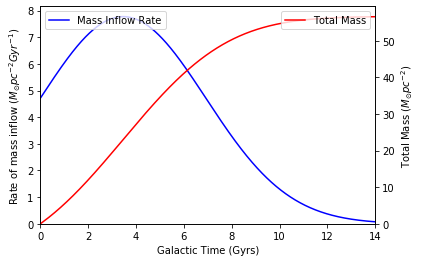

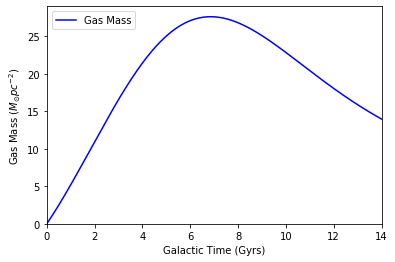

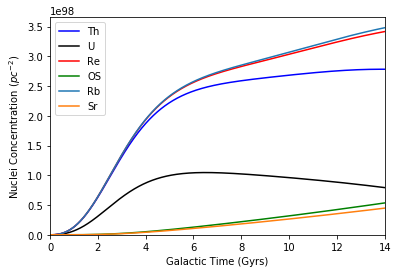

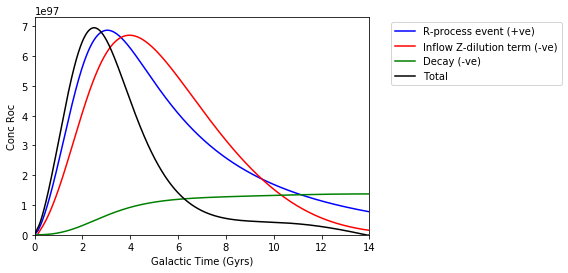

In [7]:
#Plotting the graph of mass and rate of change of mass of the galaxy
fig1,ax1 = plt.subplots()
ax2 = ax1.twinx() #Creating a second axis
ax1.plot(time,M_inflow_rate,'b',label='Mass Inflow Rate')
ax2.plot(time,M_tot,'r',label='Total Mass')
ax1.set_ylabel('Rate of mass inflow ($M_{⊙} pc^{-2} Gyr^{-1}$)')
ax2.set_ylabel('Total Mass ($M_{⊙} pc^{-2}$)')
ax1.set_xlabel('Galactic Time (Gyrs)')
ax1.set_xlim(0,t_max)
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

#Plotting the graph of the gas mass within the galaxy
fig2,ax3 = plt.subplots()
ax3.plot(time,M_gas,'b',label='Gas Mass')
ax3.set_ylabel('Gas Mass ($M_{⊙} pc^{-2}$)')
ax3.set_xlabel('Galactic Time (Gyrs)')
ax3.set_xlim(0,t_max)
ax3.set_ylim(bottom=0)
ax3.legend(loc = 'upper left')

#Plotting the graph of the gas mass within the galaxy
fig3,ax4 = plt.subplots()
ax4.plot(time,nuclei_concerntration_Th,'b',label='Th')
ax4.plot(time,nuclei_concerntration_U ,'k',label='U')
ax4.plot(time,nuclei_concerntration_Re,'r',label='Re')
ax4.plot(time,nuclei_concerntration_Os,'g',label='OS')
ax4.plot(time,nuclei_concerntration_Rb    ,label='Rb')
ax4.plot(time,nuclei_concerntration_Sr    ,label='Sr')
ax4.set_ylabel('Nuclei Concerntration ($pc^{-2}$)')
ax4.set_xlabel('Galactic Time (Gyrs)')
ax4.set_xlim(0,t_max)
ax4.set_ylim(bottom=0)
ax4.legend(loc = 'upper left')

#Plotting the graph of the gas mass within the galaxy
fig7,ax8 = plt.subplots()
ax8.plot(time,z1_yield*rate_1,'b',label='R-process event (+ve)')
ax8.plot(time,(M_inflow_rate/M_gas)*nuclei_concerntration_Th,'r',label='Inflow Z-dilution term (-ve)')
ax8.plot(time,λ_Th*nuclei_concerntration_Th,'g',label='Decay (-ve)')
ax8.plot(time,nuclei_concerntration_RoC_Th,'k',label='Total')
ax8.set_ylabel('Conc Roc')
ax8.set_xlabel('Galactic Time (Gyrs)')
ax8.set_xlim(0,t_max)
ax8.set_ylim(bottom=0)
ax8.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

In [8]:
def Age_function(λ_Re,λ_U,λ_Th,λ_Rb,M_tot_Tg,M_gas_Tg,ω,schmidt_power,z1_yield,z2_yield,N,t_max,time):
    #Calling the normal distribution function
    M_inflow_rate = normal_dist_function(time)

    #Creating the cumulative distribution curve, ie total mass at time t
    M_tot = np.zeros(N)
    M_tot[0] = 0
    for i in range(N-1):
        M_tot[i+1] = (M_tot[i]+M_inflow_rate[i+1]*(time[i+1]-time[i]))

    #The total mass at the end of the cdf can be used to normalise the pdf
    norm = M_tot_Tg/M_tot[int(N*13.8/t_max)]

    M_tot *= norm
    M_inflow_rate *= norm

    #Total mass of the gas calculation
    #Change in the mass of the gas = Mass_inflow-ω*M_gas^schmidt_power
    M_gas = np.zeros(N)
    M_gas_RoC = np.zeros(N)
    for i in range(N-1):
        M_gas_RoC[i] = M_inflow_rate[i] - ω*M_gas[i]**schmidt_power
        M_gas[i+1] = M_gas[i] + M_gas_RoC[i]*(time[i+1]-time[i])
        
    #Rate of change of a given nuclide 
    nuclei_concerntration_Th     = np.zeros(N)
    nuclei_concerntration_RoC_Th = np.zeros(N)
    nuclei_concerntration_U      = np.zeros(N)
    nuclei_concerntration_RoC_U  = np.zeros(N)
    nuclei_concerntration_Re     = np.zeros(N)
    nuclei_concerntration_RoC_Re = np.zeros(N)
    nuclei_concerntration_Os     = np.zeros(N) 
    nuclei_concerntration_Rb     = np.zeros(N)
    nuclei_concerntration_RoC_Rb = np.zeros(N)
    nuclei_concerntration_Sr     = np.zeros(N) 
    for i in range(N-1):
        #Calculating the relative nuclei concerntration of U and Th for the U/Th clock
        if M_gas[i] == 0:
            nuclei_concerntration_RoC_Th[i] = z2_yield*rate_1[i]
        else:
            nuclei_concerntration_RoC_Th[i] = (z2_yield*rate_1[i]) - ((M_inflow_rate[i]/M_gas[i])*nuclei_concerntration_Th[i]) - (λ_Th*nuclei_concerntration_Th[i])
        nuclei_concerntration_Th[i+1] = nuclei_concerntration_Th[i] + nuclei_concerntration_RoC_Th[i]*(time[i+1]-time[i])

        if M_gas[i] == 0:
            nuclei_concerntration_RoC_U[i] = z1_yield*rate_1[i]
        else:
            nuclei_concerntration_RoC_U[i] = (z1_yield*rate_1[i]) - ((M_inflow_rate[i]/M_gas[i])*nuclei_concerntration_U[i]) - (λ_U*nuclei_concerntration_U[i])
        nuclei_concerntration_U[i+1] = nuclei_concerntration_U[i] + nuclei_concerntration_RoC_U[i]*(time[i+1]-time[i])

        #Calculating the relative nuclei concerntration of Re for the OsRe clock
        if M_gas[i] == 0:
            nuclei_concerntration_RoC_Re[i] = rate_1[i]
        else:
            nuclei_concerntration_RoC_Re[i] = rate_1[i] - ((M_inflow_rate[i]/M_gas[i])*nuclei_concerntration_Re[i]) - (λ_Re*nuclei_concerntration_Re[i])
        nuclei_concerntration_Re[i+1] = nuclei_concerntration_Re[i] + nuclei_concerntration_RoC_Re[i]*(time[i+1]-time[i])
        #Calculating the (r-process) relative nuclei concerntration for Os in the ReOs clock
        nuclei_concerntration_Os[i+1] = nuclei_concerntration_Os[i] + (λ_Re*nuclei_concerntration_Re[i]*(time[i+1]-time[i]))

        #Calculating the relative nuclei concerntration of Rb for the OsRe clock
        if M_gas[i] == 0:
            nuclei_concerntration_RoC_Rb[i] = rate_1[i]
        else:
            nuclei_concerntration_RoC_Rb[i] = rate_1[i] - ((M_inflow_rate[i]/M_gas[i])*nuclei_concerntration_Rb[i]) - (λ_Rb*nuclei_concerntration_Rb[i])
        nuclei_concerntration_Rb[i+1] = nuclei_concerntration_Rb[i] + nuclei_concerntration_RoC_Rb[i]*(time[i+1]-time[i])
        #Calculating the (r-process) relative nuclei concerntration for Sr in the SrRb clock
        nuclei_concerntration_Sr[i+1] = nuclei_concerntration_Sr[i] + (λ_Rb*nuclei_concerntration_Rb[i]*(time[i+1]-time[i]))

    UTh_ratio = nuclei_concerntration_U/nuclei_concerntration_Th
    OsRe_ratio = nuclei_concerntration_Os/nuclei_concerntration_Re
    SrRb_ratio = nuclei_concerntration_Sr/nuclei_concerntration_Rb

    #Calculating the age of the universe in this case
    if np.max(UTh_ratio < 0.438+0.006):
        upper_tick = np.where(UTh_ratio < 0.438+0.006)[0][0]
        lower_tick = np.where(UTh_ratio < 0.438-0.006)[0][0]
        print('Age of the universe is between {:2.3f} and {:2.3f}Gyr for the U/Th clock'.format(time[upper_tick]+4.6,time[lower_tick]+4.6))

    if np.max(OsRe_ratio > 0.13+0.008203):
        upper_tick = np.where(OsRe_ratio > 0.13-0.008203)[0][0]
        lower_tick = np.where(OsRe_ratio > 0.13+0.008203)[0][0]
        print('Age of the universe is between {:2.3f} and {:2.3f}Gyr for the Os/Re clock'.format(time[upper_tick]+4.6,time[lower_tick]+4.6))

    #Calculating the age of the universe in this case
    if np.max(SrRb_ratio > 0.09+0.03):
        upper_tick = np.where(SrRb_ratio > 0.09-0.03)[0][0]
        lower_tick = np.where(SrRb_ratio > 0.09+0.03)[0][0]
        print('Age of the universe is between {:2.3f} and {:2.3f}Gyr for the Sr/Rb clock'.format(time[upper_tick]+4.6,time[lower_tick]+4.6))
        
    return UTh_ratio,OsRe_ratio,SrRb_ratio



In [9]:
#----------------------------------------------
#FOR UTH
print('FOR UTh')
#----------------------------------------------
#lower age
M_tot_Tg = 56-5 # +/5     M⊙ pc^-1
M_gas_Tg = 13# +/- 4     M⊙ pc^-1
ω = 0.0462 # +/- M⊙^-0.4 pc^0.8 Gyr^-1
schmidt_power = 1.25 # +/- 0.15
UTh_ratio_lower,na,na2 = Age_function(λ_Re,λ_U,λ_Th,λ_Rb,M_tot_Tg,M_gas_Tg,ω,schmidt_power,z1_yield,z2_yield,N,t_max,time)
print()
#upper age
M_tot_Tg = 56+5 # +/5     M⊙ pc^-1
M_gas_Tg = 13 # +/- 4     M⊙ pc^-1
ω = 0.0462 # +/- M⊙^-0.4 pc^0.8 Gyr^-1
schmidt_power = 1.55#+0.15 # +/- 0.15
UTh_ratio_higher,na,na2 = Age_function(λ_Re,λ_U,λ_Th,λ_Rb,M_tot_Tg,M_gas_Tg,ω,schmidt_power,z1_yield,z2_yield,N,t_max,time)
print()
#----------------------------------------------
#FOR OsRe and SrRb
print('FOR OsRe and SrRb')
#----------------------------------------------
#lower age
M_tot_Tg = 56+5 # +/5     M⊙ pc^-1
M_gas_Tg = 13# +/- 4     M⊙ pc^-1
ω = 0.0462 # +/- M⊙^-0.4 pc^0.8 Gyr^-1
schmidt_power = 1.4+0.15 # +/- 0.15
na,OsRe_ratio_lower,SrRb_ratio_lower = Age_function(λ_Re,λ_U,λ_Th,λ_Rb,M_tot_Tg,M_gas_Tg,ω,schmidt_power,z1_yield,z2_yield,N,t_max,time)
print()
#upper age
M_tot_Tg = 56-5 # +/5     M⊙ pc^-1
M_gas_Tg = 13 # +/- 4     M⊙ pc^-1
ω = 0.0462 # +/- M⊙^-0.4 pc^0.8 Gyr^-1
schmidt_power = 1.4-0.15 # +/- 0.15
na,OsRe_ratio_higher,SrRb_ratio_higher = Age_function(λ_Re,λ_U,λ_Th,λ_Rb,M_tot_Tg,M_gas_Tg,ω,schmidt_power,z1_yield,z2_yield,N,t_max,time)

FOR UTh


C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in less
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in less
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in greater
C:\

Age of the universe is between 9.813 and 10.474Gyr for the U/Th clock
Age of the universe is between 16.232 and 17.491Gyr for the Os/Re clock
Age of the universe is between 12.421 and 18.062Gyr for the Sr/Rb clock

Age of the universe is between 9.988 and 10.715Gyr for the U/Th clock
Age of the universe is between 15.387 and 16.658Gyr for the Os/Re clock
Age of the universe is between 11.986 and 17.277Gyr for the Sr/Rb clock

FOR OsRe and SrRb
Age of the universe is between 9.988 and 10.715Gyr for the U/Th clock
Age of the universe is between 15.387 and 16.658Gyr for the Os/Re clock
Age of the universe is between 11.986 and 17.277Gyr for the Sr/Rb clock

Age of the universe is between 9.813 and 10.474Gyr for the U/Th clock
Age of the universe is between 16.232 and 17.491Gyr for the Os/Re clock
Age of the universe is between 12.421 and 18.062Gyr for the Sr/Rb clock


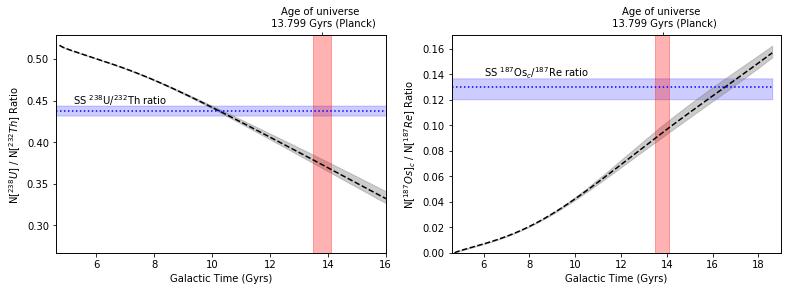

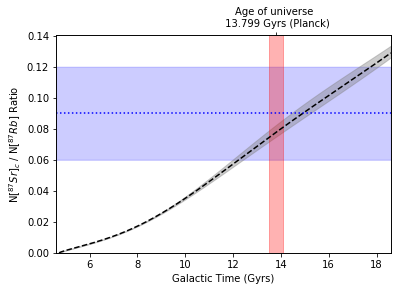

In [10]:
#Plotting the graph of the UTh ratio
fig4, ax5 = plt.subplots(1,2,figsize=(13,4))
ax5[0].plot(time+4.6,UTh_ratio,'k--',label='U/Th Ratio')
ax5[0].plot([4.6,t_max+4.6],[0.438 ,0.438],'b:')
ax5[0].axvspan(8.9+4.6,9.5+4.6,0,1,color='r',alpha=0.3)
x = np.arange(4.6,t_max+4.6,0.01)
y1 = np.array([0.438+0.006]*len(x))
y2 = np.array([0.438-0.006]*len(x))
ax5[0].fill_between(x,y2, y1,alpha=0.2, color='b')
ax5[0].fill_between(time+4.6,UTh_ratio_lower,UTh_ratio_higher,alpha=0.4, color='grey')
ax5[0].set_xlabel('Galactic Time (Gyrs)')
ax5[0].set_ylabel(r'N$[^{238}U]$ / N$[^{232}Th]$ Ratio')
ax51 = ax5[0].twiny()
ax51.set_xticks([0.807])
ax51.set_xticklabels(["Age of universe \n 13.799 Gyrs (Planck)"])
ax5[0].set_xlim(4.6,16)
ax5[0].text(5.2,0.445,'SS $^{238}$U/$^{232}$Th ratio',fontsize=10)

#Plotting the graph of the OsRe ratio
ax5[1].plot(time+4.6,OsRe_ratio,'k--',label='ReOs Ratio')
ax5[1].plot([4.6,t_max+4.6],[0.13,0.13],'b:')
ax5[1].axvspan(8.9+4.6,9.5+4.6,0,1,color='r',alpha=0.3)
x = np.arange(4.6,t_max+4.6,0.01)
y1 = np.array([0.12868+0.008203]*len(x))
y2 = np.array([0.12868-0.008203]*len(x))
ax5[1].fill_between(x,y2, y1,alpha=0.2, color='b')
ax5[1].fill_between(time+4.6,OsRe_ratio_lower,OsRe_ratio_higher,alpha=0.4, color='grey')
ax5[1].set_xlabel('Galactic Time (Gyrs)')
ax5[1].set_ylabel('N$[^{187}Os]_{c}$ / N$[^{187}Re]$ Ratio')
ax5[1].set_xlim([4.6,t_max+4.6])
ax5[1].text(6,0.138,'SS $^{187}$Os$_{c}$/$^{187}$Re ratio',fontsize=10)
ax61 = ax5[1].twiny()
ax61.set_xticks([0.64])
ax61.set_xticklabels(["Age of universe \n 13.799 Gyrs (Planck)"])
ax5[1].set_xlim([4.6,19])
ax5[1].set_ylim(bottom=0)

#Plotting the graph of the SrRb ratio
fig6, ax7 = plt.subplots()
ax7.plot(time+4.6,SrRb_ratio,'k--',label='SrRb Ratio')
ax7.plot([4.6,t_max+4.6],[0.09,0.09],'b:')
ax7.axvspan(8.9+4.6,9.5+4.6,0,1,color='r',alpha=0.3)
x = np.arange(4.6,t_max+4.6,0.01)
y1 = np.array([0.09+0.03]*len(x))
y2 = np.array([0.09-0.03]*len(x))
ax7.fill_between(x,y2, y1,alpha=0.2, color='b')
ax7.fill_between(time+4.6,SrRb_ratio_lower,SrRb_ratio_higher,alpha=0.4, color='grey')
ax7.set_xlabel('Galactic Time (Gyrs)')
ax7.set_ylabel('N$[^{87}Sr]_{c}$ / N$[^{87}Rb]$ Ratio')
ax7.set_xlim([4.6,t_max+4.6])
ax7.set_ylim(bottom=0)
ax71 = ax7.twiny()
ax71.set_xticks([0.657])
ax71.set_xticklabels(["Age of universe \n 13.799 Gyrs (Planck)"])

plt.show()